# Homework 2 - Data Wrangling with Hadoop

The goal of this assignment is to put into action the data wrangling techniques from the exercises of week-3 and week-4. We highly suggest you to finish these two exercises first and then start the homework. In this homework, we are going to reuse the same __sbb__ and __twitter__ datasets as seen before in these two exercises. 

## Hand-in Instructions
- __Due: 13.04.2021 23:59 CET__
- `git push` your final verion to your group's Renku repository before the due date
- Verify that `Dockerfile`, `environment.yml` and `requirements.txt` are properly written and notebook is functional
- Add necessary comments and discussion to make your queries readable

## Hive Documentation

Hive queries: <https://cwiki.apache.org/confluence/display/Hive/LanguageManual+Select>

Hive functions: <https://cwiki.apache.org/confluence/display/Hive/LanguageManual+UDF>

<div style="font-size: 150%" class="alert alert-block alert-warning">
    <b>Get yourself ready:</b> 
    <br>
    Before you jump into the questions, please first go through the notebook <a href='./prepare_env.ipynb'>prepare_env.ipynb</a> and make sure that your environment is properly set up.
    <br><br>
    <b>Cluster Usage:</b>
    <br>
    As there are many of you working with the cluster, we encourage you to prototype your queries on small data samples before running them on whole datasets.
    <br><br>
    <b>Try to use as much HiveQL as possible and avoid using pandas operations.</b>
</div>

## Part I: SBB/CFF/FFS Data (40 Points)

Data source: <https://opentransportdata.swiss/en/dataset/istdaten>

In this part, you will leverage Hive to perform exploratory analysis of data published by the [Open Data Platform Swiss Public Transport](https://opentransportdata.swiss).

Format: the dataset is originally presented as a collection of textfiles with fields separated by ';' (semi-colon). For efficiency, the textfiles have been compressed into Optimized Row Columnar ([ORC](https://cwiki.apache.org/confluence/display/Hive/LanguageManual+ORC)) file format. 

Location: you can find the data in ORC format on HDFS at the path `/data/sbb/orc/istdaten`.

The full description from opentransportdata.swiss can be found in <https://opentransportdata.swiss/de/cookbook/ist-daten/> in four languages. Because of the translation typos there may be some misunderstandings. We suggest you rely on the German version and use an automated translator when necessary. We will clarify if there is still anything unclear in class and Slack. Here are the relevant column descriptions:

- `BETRIEBSTAG`: date of the trip
- `FAHRT_BEZEICHNER`: identifies the trip
- `BETREIBER_ABK`, `BETREIBER_NAME`: operator (name will contain the full name, e.g. Schweizerische Bundesbahnen for SBB)
- `PRODUKT_ID`: type of transport, e.g. train, bus
- `LINIEN_ID`: for trains, this is the train number
- `LINIEN_TEXT`,`VERKEHRSMITTEL_TEXT`: for trains, the service type (IC, IR, RE, etc.)
- `ZUSATZFAHRT_TF`: boolean, true if this is an additional trip (not part of the regular schedule)
- `FAELLT_AUS_TF`: boolean, true if this trip failed (cancelled or not completed)
- `HALTESTELLEN_NAME`: name of the stop
- `ANKUNFTSZEIT`: arrival time at the stop according to schedule
- `AN_PROGNOSE`: actual arrival time
- `AN_PROGNOSE_STATUS`: show how the actual arrival time is calcluated
- `ABFAHRTSZEIT`: departure time at the stop according to schedule
- `AB_PROGNOSE`: actual departure time
- `AB_PROGNOSE_STATUS`: show how the actual departure time is calcluated
- `DURCHFAHRT_TF`: boolean, true if the transport does not stop there

Each line of the file represents a stop and contains arrival and departure times. When the stop is the start or end of a journey, the corresponding columns will be empty (`ANKUNFTSZEIT`/`ABFAHRTSZEIT`).

In some cases, the actual times were not measured so the `AN_PROGNOSE_STATUS`/`AB_PROGNOSE_STATUS` will be empty or set to `PROGNOSE` and `AN_PROGNOSE`/`AB_PROGNOSE` will be empty.

__Initialization__

In [8]:
import os
import pandas as pd
pd.set_option("display.max_columns", 50)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

username = os.environ['JUPYTERHUB_USER']
hiveaddr = os.environ['HIVE_SERVER_2']
print("Operating as: {0}".format(username))

Operating as: jellouli


In [9]:
from pyhive import hive

# create connection
conn = hive.connect(host=hiveaddr, 
                    port=10000,
                    username=username) 
# create cursor
cur = conn.cursor()

### a) Type of transport - 10/40

In the exercise of week-3, you have already explored the stop distribution of different types of transport on 05.11.2018. Now, let's do the same for the whole dataset.

- Query `sbb_orc` to get the total number of stops for different types of transport in each month, and order it by time and type of transport.
|month_year|ttype|stops|
|---|---|---|
|...|...|...|
- Use `plotly` to create a facet bar chart partitioned by the type of transportation. 
- Document any patterns or abnormalities you can find.

__Note__: 
- In general, one entry in the `sbb_orc` table means one stop.
- You might need to filter out the rows where:
    - `BETRIEBSTAG` is not in the format of `__.__.____`
    - `PRODUKT_ID` is NULL or empty
- Facet plot with plotly: https://plotly.com/python/facet-plots/

In [ ]:
# You may need more than one query, do not hesitate to create more
# query = """
#
#     /* TODO */
#
# """
# cur.execute(query, conn)

query = """

    /* TODO */
    
""".format(username)
df_ttype = pd.read_sql(query, conn)

In [ ]:
fig = px.bar(
    df_ttype,
    
    # TODO
)

# TODO: make your figure more readable

fig.show()

### b) Schedule - 10/40

- Select a typical week day (not Saturday, not Sunday, not a bank holiday) from `sbb_orc`. Query the one-day table and get the set of IC (`VERKEHRSMITTEL_TEXT`) trains you can take to go (without connections) from Genève to Lausanne on that day. 
- Display the train number (`LINIEN_ID`) as well as the schedule (arrival and departure time) of the trains.

|train_number|departure|arrival|
|---|---|---|
|...|...|...|

__Note:__ 
- The schedule of IC from Genève to Lausanne has not changed for the past few years. You can use the advanced search of SBB's website to check your answer.
- Do not hesitate to create intermediary tables. 
- You might need to add filters on these flags: `ZUSATZFAHRT_TF`, `FAELLT_AUS_TF`, `DURCHFAHRT_TF` 
- Functions that could be useful: `unix_timestamp`, `to_utc_timestamp`, `date_format`.

In [ ]:
# You may need more than one query, do not hesitate to create more
# query = """
#
#     /* TODO */
#
# """
# cur.execute(query, conn)

query = """
    
    /* TODO */
    
""".format(username)
pd.read_sql(query, conn)

### c) Delay percentiles - 10/40

- Query `sbb_orc` to compute the 50th and 75th percentiles of __arrival__ delays for IC 702, 704, ..., 728, 730 (15 trains total) at Genève main station. 
- Use `plotly` to plot your results in a proper way. 
- Which trains are the most disrupted? Can you find the tendency and interpret?

__Note:__
- Do not hesitate to create intermediary tables. 
- When the train is ahead of schedule, count this as a delay of 0.
- Use only stops with `AN_PROGNOSE_STATUS` equal to __REAL__ or __GESCHAETZT__.
- Functions that may be useful: `unix_timestamp`, `percentile_approx`, `if`

In [ ]:
# You may need more than one query, do not hesitate to create more
# query = """
#
#     /* TODO */
#
# """
# cur.execute(query, conn)

query = """

    /* TODO */
    
""".format(username)
df_delays_ic_gen = pd.read_sql(query, conn)

In [ ]:
fig = px.bar(
    df_delays_ic_gen, 
    
    # TODO
)

# TODO: make your figure more readable

fig.show()

### d) Delay heatmap 10/40

- For each week (1 to 52) of each year (2018 to 2020), query `sbb_orc` to compute the median of delays of all trains __departing__ from any train stations in Zürich area during that week. 
- Use `plotly` to draw a heatmap (year x week) of the median delays. 
- In which weeks were the trains delayed the most/least? Can you explain the results?

__Note:__
- Do not hesitate to create intermediary tables. 
- When the train is ahead of schedule, count this as a delay of 0.
- Use only stops with `AB_PROGNOSE_STATUS` equal to __REAL__ or __GESCHAETZT__.
- For simplicty, a train station in Zürich area <=> it's a train station & its `HALTESTELLEN_NAME` starts with __Zürich__.
- Heatmap with `plotly`: https://plotly.com/python/heatmaps/
- Functions that may be useful: `unix_timestamp`, `from_unixtime`, `weekofyear`, `percentile_approx`, `if`

In [10]:
query = """
    with departures as(
        select unix_timestamp(ABFAHRTSZEIT, 'dd.MM.yyy HH:mm') as expected, 
               unix_timestamp(AB_PROGNOSE, 'dd.MM.yyy HH:mm:ss') as actual,
               from_unixtime(unix_timestamp(BETRIEBSTAG, 'dd.MM.yyyy')) as day
        from {0}.sbb_orc
        where PRODUKT_ID = "Zug" 
          and HALTESTELLEN_NAME like "Zürich%"
          and (AB_PROGNOSE_STATUS = "REAL" or AB_PROGNOSE_STATUS = "GESCHAETZT")
    )
    select weekofyear(day) as week,
           year(day) as year,
           percentile_approx(if(expected < actual, actual - expected, 0), 0.5) as median_delay
    from departures
    group by year(day), weekofyear(day)             
""".format(username)

df_delays_zurich = pd.read_sql(query, conn)

In [11]:
df_delays_zurich = df_delays_zurich[df_delays_zurich.week.isin(range(1, 53))] # 2020 has an extra week

In [12]:
print(len(df_delays_zurich[df_delays_zurich.year == 2018]))
print(len(df_delays_zurich[df_delays_zurich.year == 2019]))
print(len(df_delays_zurich[df_delays_zurich.year == 2020]))

52
50
52


In [13]:
df_delays_zurich = df_delays_zurich.pivot(index='year', columns='week', values='median_delay')

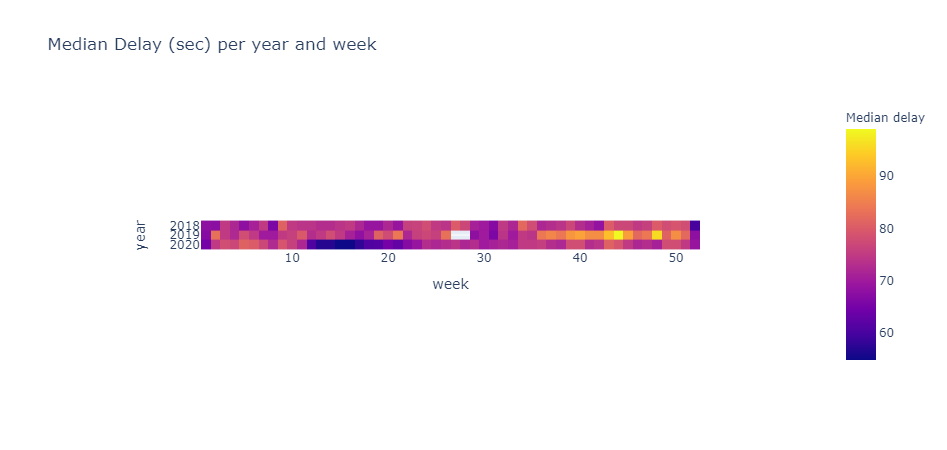

In [14]:
fig = px.imshow(
    df_delays_zurich, 
    labels = {'color':'Median delay'},
    title = 'Median Delay (sec) per year and week'
)
fig.update_layout(hovermode='x unified')

fig.show()

Delays are highest during weeks **43 to 51**: This may be due to the weather, namely snow and rain that can cause technical incidents and delay the trains.  
Delays are lowest during weeks **12 to 19**: Good weather conditions may be an explanation to this, incidents are rare and things happen on schedule.

## Part II: Twitter Data (20 Points)

Data source: https://archive.org/details/twitterstream?sort=-publicdate 

In this part, you will leverage Hive to extract the hashtags from the source data, and then perform light exploration of the prepared data. 

### Dataset Description 

Format: the dataset is presented as a collection of textfiles containing one JSON document per line. The data is organized in a hierarchy of folders, with one file per minute. The textfiles have been compressed using bzip2. In this part, we will mainly focus on __2020 twitter data__.

Location: you can find the data on HDFS at the path `/data/twitter/json/2020/{month}/{day}/{hour}/{minute}.json.bz2`. 

Relevant fields: 
- `created_at`, `timestamp_ms`: The first is a human-readable string representation of when the tweet was posted. The latter represents the same instant as a timestamp in seconds since UNIX epoch. 
- `lang`: the language of the tweet content 
- `entities`: parsed entities from the tweet, e.g. hashtags, user mentions, URLs.
- In this repository, you can find [a tweet example](../data/tweet-example.json).

<div style="font-size: 100%" class="alert alert-block alert-danger">
    <b>Disclaimer</b>
    <br>
    This dataset contains unfiltered data from Twitter. As such, you may be exposed to tweets/hashtags containing vulgarities, references to sexual acts, drug usage, etc.
    </div>

### a) JsonSerDe - 4/20

In the exercise of week 4, you have already seen how to use the [SerDe framework](https://cwiki.apache.org/confluence/display/Hive/LanguageManual+DDL#LanguageManualDDL-RowFormats&SerDe) to extract JSON fields from raw text format. 

In this question, please use SerDe to create an <font color="red" size="3px">EXTERNAL</font> table with __one day__ twitter data. You only need to extract three columns: `timestamp_ms`, `lang` and `entities`(with the field `hashtags` only) with following schema (you need to figure out what to fill in `...`):
```
timestamp_ms string,
lang         string,
entities     struct<hashtags:array<...<text:..., indices:...>>>
```

The table you create should be similar to:

| timestamp_ms | lang | entities |
|---|---|---|
| 1234567890001 | en | {"hashtags":[]} |
| 1234567890002 | fr | {"hashtags":[{"text":"hashtag1","indices":[10]}]} |
| 1234567890002 | jp | {"hashtags":[{"text":"hashtag1","indices":[14,23]}, {"text":"hashtag2","indices":[45]}]} |

__Note:__
   - JsonSerDe: https://cwiki.apache.org/confluence/display/Hive/LanguageManual+DDL#LanguageManualDDL-RowFormats&SerDe
   - Hive data types: https://cwiki.apache.org/confluence/display/Hive/LanguageManual+Types#LanguageManualTypes

In [ ]:
query="""
    drop table if exists {0}.hashtags_one_day_intermediary
""".format(username)
cur.execute(query)

query="""
    create external table {0}.hashtags_one_day_intermediary(
        
        /* TODO */
    
    )
    
    /* TODO */
    
""".format(username)
cur.execute(query)

query="""
    select * from {0}.hashtags_one_day_intermediary limit 10
""".format(username)
pd.read_sql(query, conn)

### b) Explosion - 4/20

In a), you create a table where each row could contain a list of multiple hashtags. Create another table by normalizing the table obtained from the previous step. This means that each row should contain exactly one hashtag. Include `timestamp_ms` and `lang` in the resulting table, as shown below.

| timestamp_ms | lang | hashtag |
|---|---|---|
| 1234567890001 | es | hashtag1 |
| 1234567890001 | es | hashtag2 |
| 1234567890002 | en | hashtag2 |
| 1234567890003 | zh | hashtag3 |

__Note:__
   - `LateralView`: https://cwiki.apache.org/confluence/display/Hive/LanguageManual+LateralView
   - `explode` function: <https://cwiki.apache.org/confluence/display/Hive/LanguageManual+UDF#LanguageManualUDF-explode>

In [ ]:
query="""
    drop table if exists {0}.hashtags_one_day
""".format(username)
cur.execute(query)

query="""
    create table if not exists {0}.hashtags_one_day
    stored as orc
    as
        
        /* TODO */
        
""".format(username)
cur.execute(query)

query="""
    select * from {0}.hashtags_one_day limit 10
""".format(username)
pd.read_sql(query, conn)

### c) Hashtags - 8/20

Query the normailized table you obtained in b). Create a table of the top 20 most mentioned hashtags with the contribution of each language. And, for each hashtag, order languages by their contributions. You should have a table similar to:

|hashtag|lang|lang_count|total_count|
|---|---|---|---|
|hashtag_1|en|2000|3500|
|hashtag_1|fr|1000|3500|
|hashtag_1|jp|500|3500|
|hashtag_2|te|500|500|

Use `plotly` to create a stacked bar chart to show the results.

__Note:__ to properly order the bars, you may need:
```python
fig.update_layout(xaxis_categoryorder = 'total descending')
```

In [ ]:
# You may need more than one query, do not hesitate to create more
# query = """
#
#     /* TODO */
#
# """
# cur.execute(query, conn)

query="""
    
    /* TODO */
    
""".format(username)
df_hashtag = pd.read_sql(query, conn)

In [ ]:
fig = px.bar(
    df_hashtag,
    
    # TODO

)

# TODO: make your figure more readable

fig.show()

### d) HBase - 4/20

In the lecture and exercise of week-4, you have learnt what's HBase, how to create an Hbase table and how to create an external Hive table on top of the HBase table. Now, let's try to save the results of question c) into HBase, such that each entry looks like:
```
(b'PIE', {b'cf1:total_count': b'31415926', b'cf2:langs': b'ja,en,ko,fr'})
``` 
where the key is the hashtag, `total_count` is the total count of the hashtag, and `langs` is a string of language abbreviations concatenated with commas. 

__Note:__
- To accomplish the task, you need to follow these steps:
    - Create an Hbase table called `twitter_hbase`, in **your hbase namespace**, with two column families and fields (cf1, cf2)
    - Create an external Hive table called `twitter_hive_on_hbase` on top of the Hbase table. 
    - Populate the HBase table with the results of question c).
- You may find function `concat_ws` and `collect_list` useful.

In [ ]:
import happybase
hbaseaddr = os.environ['HBASE_SERVER']
hbase_connection = happybase.Connection(hbaseaddr, transport='framed',protocol='compact')

In [ ]:
# TODO

# That's all, folks!